<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/CNN/blob/main/NhanDienTraiCay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [107]:
#Link Train va test
train_path = "/content/drive/MyDrive/train"
test_path = "/content/drive/MyDrive/test"


In [108]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


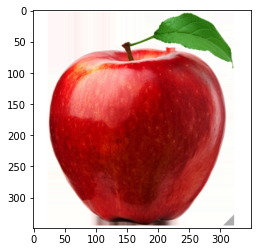

(349, 349, 3)

In [109]:
#Load va Hien thi anh
img = load_img(train_path + "/Apple/apple_1.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()
img = img_to_array(img)
img.shape

In [110]:
#Load anh thanh train va test 
train = ImageDataGenerator(rescale=1/255,shear_range=0.3,horizontal_flip=True,vertical_flip=False,zoom_range=0.3)
test =ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory(train_path,target_size=(100,100),batch_size=32,color_mode="rgb",class_mode="categorical")
test_dataset = test.flow_from_directory(test_path,target_size=(100,100),batch_size=32,color_mode="rgb",class_mode="categorical")

Found 288 images belonging to 6 classes.
Found 77 images belonging to 6 classes.


In [111]:
test_dataset.class_indices

{'Apple': 0, 'Banana': 1, 'Dua Vang': 2, 'Mango': 3, 'Mixed': 4, 'Orange': 5}

In [112]:
#Thiet Lap Model 
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.01))

model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 10, 10, 128)     

In [113]:
#Complie Model 
model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

In [114]:
#Training Model 
history = model.fit(train_dataset,epochs = 50,batch_size=64, validation_data = test_dataset)

Epoch 1/50
2/9 [=====>........................] - ETA: 3s - loss: 1.7879 - accuracy: 0.3125  

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 58s 629ms/step - loss: 1.7829 - accuracy: 0.2569 - val_loss: 1.7727 - val_accuracy: 0.3377
Epoch 2/50
9/9 [==============================] - 5s 558ms/step - loss: 1.7647 - accuracy: 0.3472 - val_loss: 1.7584 - val_accuracy: 0.4156
Epoch 3/50
9/9 [==============================] - 5s 561ms/step - loss: 1.7483 - accuracy: 0.3611 - val_loss: 1.7441 - val_accuracy: 0.5325
Epoch 4/50
9/9 [==============================] - 5s 530ms/step - loss: 1.7275 - accuracy: 0.4826 - val_loss: 1.7297 - val_accuracy: 0.4675
Epoch 5/50
9/9 [==============================] - 5s 564ms/step - loss: 1.7108 - accuracy: 0.4340 - val_loss: 1.7153 - val_accuracy: 0.5065
Epoch 6/50
9/9 [==============================] - 5s 550ms/step - loss: 1.6907 - accuracy: 0.4722 - val_loss: 1.7005 - val_accuracy: 0.5325
Epoch 7/50
9/9 [==============================] - 5s 572ms/step - loss: 1.6758 - accuracy: 0.4201 - val_loss: 1.6874 - val_accuracy: 0.5584
Epoch 8/50
9/9 [==============

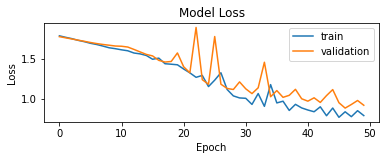

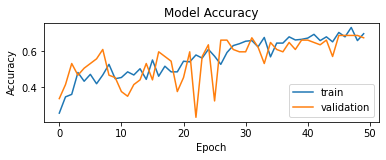

In [115]:
#Ve Do thi Loss
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Ve Do thi Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [131]:
#Tinh toan do chinh xac va sai so 
score = model.evaluate(test_dataset,verbose = 0)
print('Sai so kiem tra la:',score[0])
print('Do chinh xac kiem tra', score[1])

Sai so kiem tra la: 0.925368070602417
Do chinh xac kiem tra 0.6753246784210205


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [117]:
label=['Apple', 'Banana', 'Dua Vang', 'Mango', 'Mixed', 'Orange']

Day la Apple


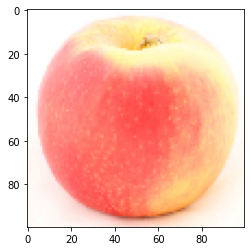

In [118]:
#Load va hien thi anh 
img = load_img(test_path + "/Apple/apple_78.jpg",grayscale=False,color_mode='rgb',target_size=(100,100))
plt.imshow(img)
#Chuyen Anh ve Dang Array
img = img_to_array(img)
x = np.expand_dims(img,axis=0)
images = np.vstack([x])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images))]) 


Day la Orange


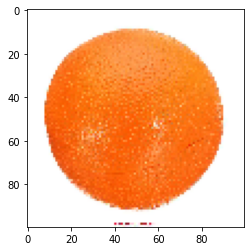

In [119]:
#Load va hien thi anh 
img1 = load_img(test_path + "/Orange/orange_83.jpg",grayscale=False,color_mode='rgb',target_size=(100,100))
plt.imshow(img1)
#Chuyen Anh ve Dang Array
img1 = img_to_array(img1)
x2 = np.expand_dims(img1,axis=0)
images1 = np.vstack([x2])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images1))]) 


Day la Banana


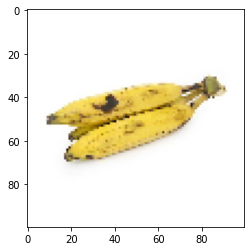

In [133]:
#Load va hien thi anh 
img2 = load_img(test_path + "/Banana/banana_80.jpg",grayscale=False,color_mode='rgb',target_size=(100,100))
plt.imshow(img2)
#Chuyen Anh ve Dang Array
img2 = img_to_array(img2)
x3 = np.expand_dims(img2,axis=0)
images2 = np.vstack([x3])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images2))]) 